# Calibrating PKPD Model to AL TES Data from [Bassat et al., 2009](https://pubmed.ncbi.nlm.nih.gov/19936217/) and [Baraka et al., 2014](https://journals.asm.org/doi/10.1128/aac.03647-14)

## **Parameters**: 50k patients, 50 values of pmax_lum with EC50_lum, pmax_art and EC50_art at default values

## **Drug:** AL

### **Gene locus and Allele:** pfmdr1 N86

**Number of patients in arm:** 56

**Number of patients cured:** 49

**Efficacy:** 0.875 or 87.5%


### **Gene locus and Allele:** pfmdr1 86Y
**Number of patients in arm:** 35

**Number of patients cured:** 35

**Efficacy:** 1 or 100%


### **Gene locus and Allele:** pfcrt K76
**Number of patients in arm:** 27

**Number of patients cured:** 25

**Efficacy:** 0.9259 or 92.59%


### **Gene locus and Allele:** pfcrt 76T
**Number of patients in arm:** 62

**Number of patients cured:** 57

**Efficacy:** 0.9194 or 91.94%


<br>

In [2]:
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
from timeit import default_timer as timer
from matplotlib.ticker import MaxNLocator
import pickle
from tqdm import tqdm  # For progress bar
from multiprocessing import Pool, cpu_count

<br>

### Calculating efficacy with 50 different values of pmax_lum and with pmax_art at default (pmax_art = 0.983)

<br>

### Test 01: pmax_lum Range: 0.5 to 0.9995 
#### Number of Patients: 5000

In [3]:
# Define the range for pmax_lum
min_pmax = 0.5
max_pmax = 0.9995

# Define pmax_art values
pmax_values = np.linspace(min_pmax, max_pmax, 50)  

# Initialize a grid to store the clearance rates
efficacy = np.zeros(len(pmax_values))

In [6]:
# Function to run a single simulation for a given pmax_art value
def run_simulation(idx, pmax):
    command_pmax_art_adj = [
        "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
        "--AL",
        "-n", "5000",
        "--pmax_lum", str(pmax),
        "-o", "1"
    ]

    try:
        # Run the command and capture output
        output_pmax_lum = subprocess.run(command_pmax_art_adj, capture_output=True, text=True, check=True)

        # Process the output
        lines_pmax_lum = output_pmax_lum.stdout.splitlines()
        df_pmax_lum = pd.DataFrame([line.split(',') for line in lines_pmax_lum], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
        # Clean the DataFrame
        df_pmax_lum = df_pmax_lum.iloc[1:].apply(pd.to_numeric, errors='coerce')

        # Calculate the efficacy
        failed_treatment_count = df_pmax_lum[(df_pmax_lum['PARASITEDENSITY'] >= 10)].shape[0]
        total_patients = df_pmax_lum['PID'].nunique()
        efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0

        return (idx, efficacy)

    except subprocess.CalledProcessError as e:
        print(f"Error in subprocess for pmax_art: {pmax}: {e}")
        return (idx, np.nan)  # Return NaN in case of failure
    except Exception as e:
        print(f"An unexpected error occurred for pmax_art: {pmax}: {e}")
        return (idx, np.nan)  # Return NaN in case of failure

# Define number of workers (use all available CPU cores)
num_workers = cpu_count()

# Prepare a list of parameters to pass to the pool
params_list = [(i, pmax_values[i]) for i in range(len(pmax_values))]

# Run simulations in parallel and track progress
with Pool(processes=num_workers) as pool:
    results = []
    with tqdm(total=len(params_list), desc="Running simulations") as pbar:
        for result in pool.starmap(run_simulation, params_list):
            results.append(result)
            pbar.update(1)  # Update progress bar after each result

# Update the clearance_rates array with the results
for idx, eff in results:
    efficacy[idx] = eff

# Create a DataFrame with pmax_values and clearance_rates
df = pd.DataFrame({
    'pmax_lum': pmax_values,
    'efficacy': efficacy
})

# Save the DataFrame to a pickle file
df.to_pickle("pkpd_AL_pmax_lum_test_01_efficacy..pyobj")

# Save the DataFrame to a CSV file
df.to_csv("pkpd_AL_pmax_lum_test_01_efficacy.csv", index=False)

print("DataFrame saved as pickle and CSV files successfully.")

Running simulations: 100%|██████████| 50/50 [16:12<00:00, 19.45s/it]   

DataFrame saved as pickle and CSV files successfully.


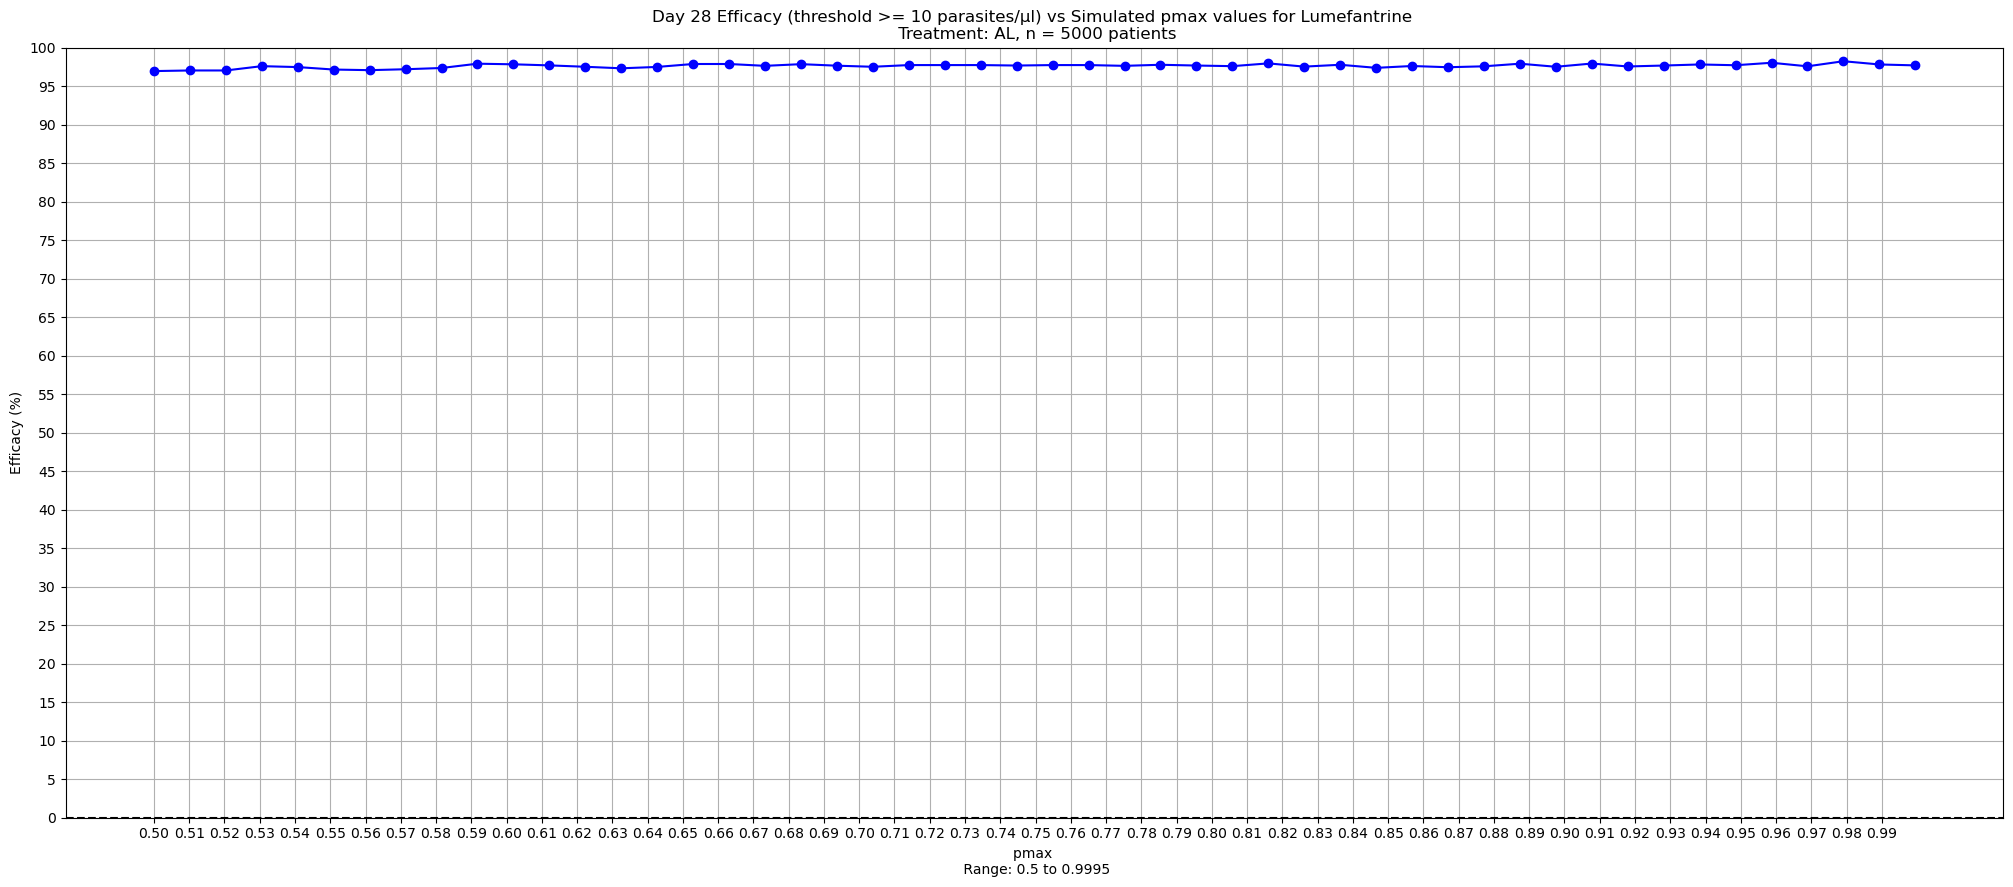

In [7]:
plt.figure(figsize=(25, 10))  # Adjust the figure size as needed
plt.plot(pmax_values, efficacy, marker='o', linestyle='-', color='b')
plt.xlabel('pmax \n Range: 0.5 to 0.9995')
plt.ylabel('Efficacy (%)')
plt.title("Day 28 Efficacy (threshold >= 10 parasites/μl) vs Simulated pmax values for Lumefantrine \n Treatment: AL, n = 5000 patients")
plt.grid(True)
plt.xticks(np.arange(min(pmax_values), max(pmax_values), 0.01))  # Adjust tick marks if necessary
plt.yticks(np.arange(0, 101, 5))  # Y-axis ticks from 0 to 100%
plt.axhline(y=0, color='k', linestyle='--')  # Optional: horizontal line at y=0
plt.savefig("pkpd_AL_pmax_lum_test_01_efficacy.png")
plt.show()

<br>

### Test 02: pmax_lum Range: 0.09 to 0.1
#### Number of Patients: 5000

In [8]:
# Define the range for pmax_lum
min_pmax = 0.1
max_pmax = 0.09

# Define pmax_art values
pmax_values = np.linspace(min_pmax, max_pmax, 50)  

# Initialize a grid to store the clearance rates
efficacy = np.zeros(len(pmax_values))

In [9]:
def run_simulation(idx, pmax):
    command_pmax_art_adj = [
        "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
        "--AL",
        "-n", "5000",
        "--pmax_lum", str(pmax),
        "-o", "1"
    ]

    try:
        # Run the command and capture output
        output_pmax_lum = subprocess.run(command_pmax_art_adj, capture_output=True, text=True, check=True)

        # Process the output
        lines_pmax_lum = output_pmax_lum.stdout.splitlines()
        df_pmax_lum = pd.DataFrame([line.split(',') for line in lines_pmax_lum], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
        # Clean the DataFrame
        df_pmax_lum = df_pmax_lum.iloc[1:].apply(pd.to_numeric, errors='coerce')

        # Calculate the efficacy
        failed_treatment_count = df_pmax_lum[(df_pmax_lum['PARASITEDENSITY'] >= 10)].shape[0]
        total_patients = df_pmax_lum['PID'].nunique()
        efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0

        return (idx, efficacy)

    except subprocess.CalledProcessError as e:
        print(f"Error in subprocess for pmax_art: {pmax}: {e}")
        return (idx, np.nan)  # Return NaN in case of failure
    except Exception as e:
        print(f"An unexpected error occurred for pmax_art: {pmax}: {e}")
        return (idx, np.nan)  # Return NaN in case of failure

# Define number of workers (use all available CPU cores)
num_workers = cpu_count()

# Prepare a list of parameters to pass to the pool
params_list = [(i, pmax_values[i]) for i in range(len(pmax_values))]

# Run simulations in parallel and track progress
with Pool(processes=num_workers) as pool:
    results = []
    with tqdm(total=len(params_list), desc="Running simulations") as pbar:
        for result in pool.starmap(run_simulation, params_list):
            results.append(result)
            pbar.update(1)  # Update progress bar after each result

# Update the clearance_rates array with the results
for idx, eff in results:
    efficacy[idx] = eff

# Create a DataFrame with pmax_values and clearance_rates
df = pd.DataFrame({
    'pmax_lum': pmax_values,
    'efficacy': efficacy
})

# Save the DataFrame to a pickle file
df.to_pickle("pkpd_AL_pmax_lum_test_02_efficacy..pyobj")

# Save the DataFrame to a CSV file
df.to_csv("pkpd_AL_pmax_lum_test_02_efficacy.csv", index=False)

print("DataFrame saved as pickle and CSV files successfully.")

Running simulations: 100%|██████████| 50/50 [28:23<00:00, 34.07s/it]    

DataFrame saved as pickle and CSV files successfully.


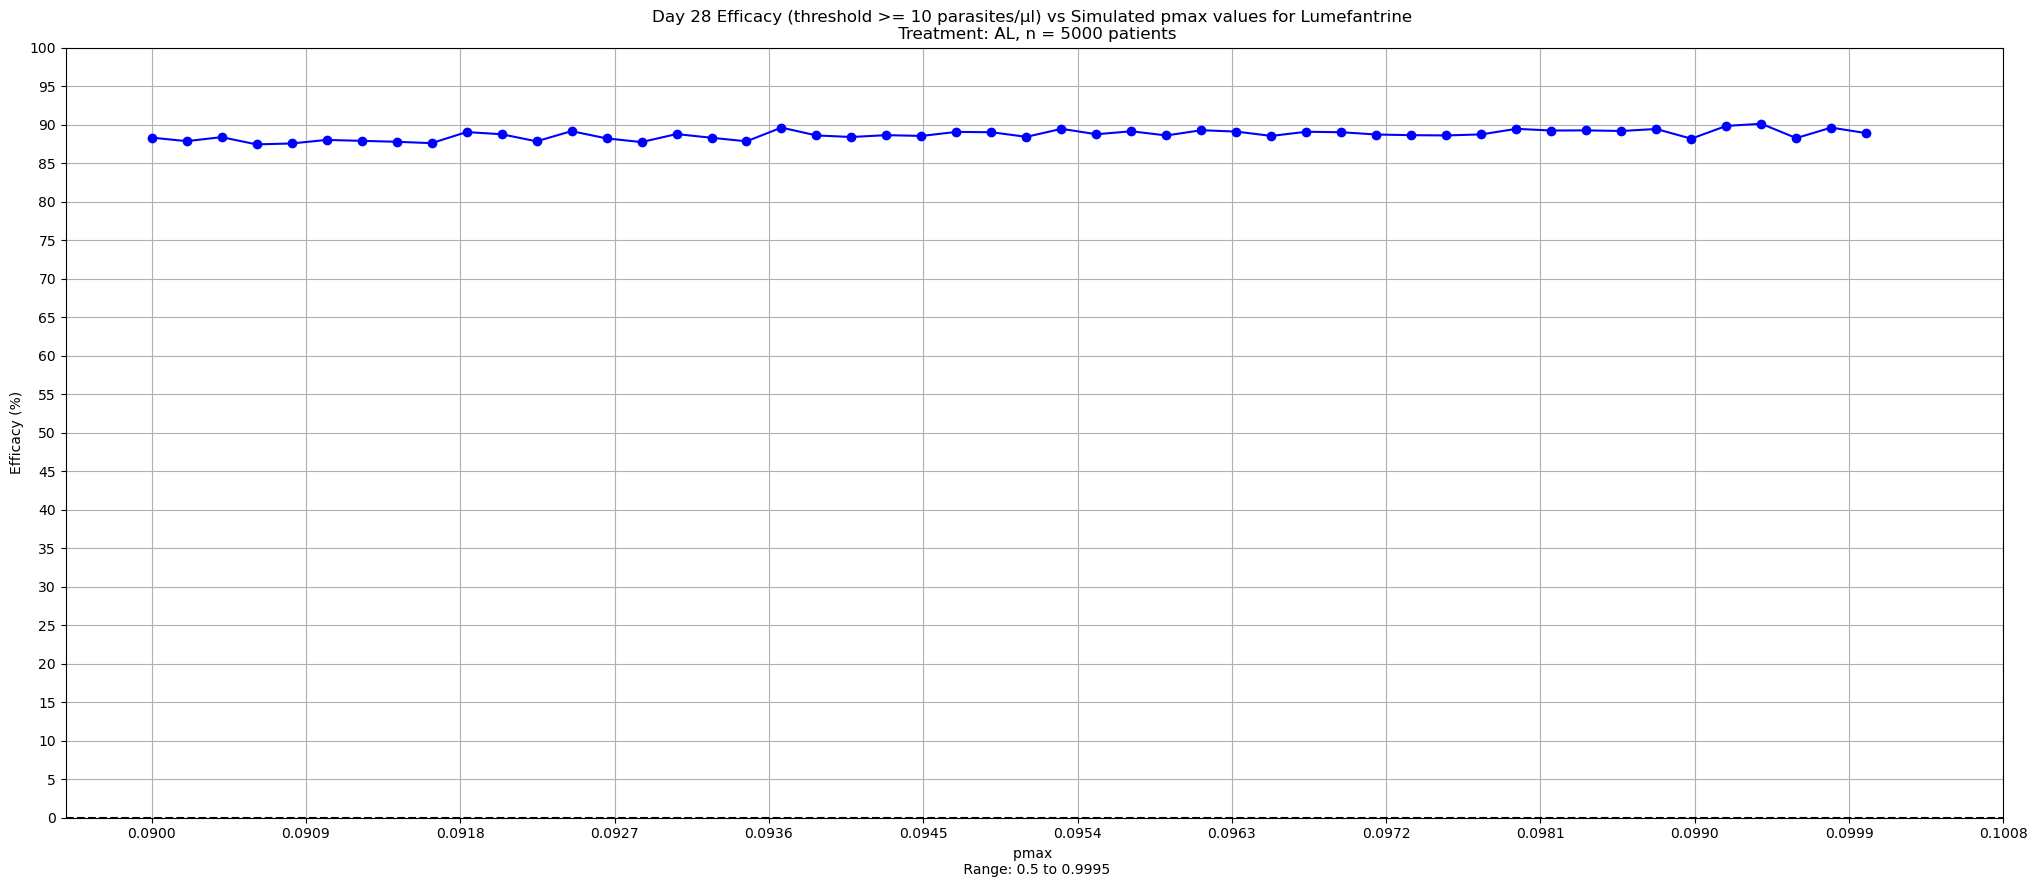

In [18]:
plt.figure(figsize=(25, 10))  # Adjust the figure size as needed
plt.plot(pmax_values, efficacy, marker='o', linestyle='-', color='b')
plt.xlabel('pmax \n Range: 0.1 to 0.09')
plt.ylabel('Efficacy (%)')
plt.title("Day 28 Efficacy (threshold >= 10 parasites/μl) vs Simulated pmax values for Lumefantrine \n Treatment: AL, n = 5000 patients")
plt.grid(True)
plt.xticks(np.arange(min(pmax_values), max(pmax_values)+0.0009, 0.0009))  # Adjust tick marks if necessary
plt.yticks(np.arange(0, 101, 5))  # Y-axis ticks from 0 to 100%
plt.axhline(y=0, color='k', linestyle='--')  # Optional: horizontal line at y=0
plt.savefig("pkpd_AL_pmax_lum_test_02_efficacy.png")
plt.show()

<br>

### Test 03: pmax_lum Range: 0.09 to 0.01
#### Number of Patients: 5000

In [5]:
# Define the range for pmax_lum
min_pmax = 0.01
max_pmax = 0.09

# Define pmax_art values
pmax_values = np.linspace(min_pmax, max_pmax, 50)  

# Initialize a grid to store the clearance rates
efficacy = np.zeros(len(pmax_values))

In [6]:
def run_simulation(idx, pmax):
    command_pmax_art_adj = [
        "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
        "--AL",
        "-n", "5000",
        "--pmax_lum", str(pmax),
        "-o", "1"
    ]

    try:
        # Run the command and capture output
        output_pmax_lum = subprocess.run(command_pmax_art_adj, capture_output=True, text=True, check=True)

        # Process the output
        lines_pmax_lum = output_pmax_lum.stdout.splitlines()
        df_pmax_lum = pd.DataFrame([line.split(',') for line in lines_pmax_lum], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
        # Clean the DataFrame
        df_pmax_lum = df_pmax_lum.iloc[1:].apply(pd.to_numeric, errors='coerce')

        # Calculate the efficacy
        failed_treatment_count = df_pmax_lum[(df_pmax_lum['PARASITEDENSITY'] >= 10)].shape[0]
        total_patients = df_pmax_lum['PID'].nunique()
        efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0

        return (idx, efficacy)

    except subprocess.CalledProcessError as e:
        print(f"Error in subprocess for pmax_art: {pmax}: {e}")
        return (idx, np.nan)  # Return NaN in case of failure
    except Exception as e:
        print(f"An unexpected error occurred for pmax_art: {pmax}: {e}")
        return (idx, np.nan)  # Return NaN in case of failure

# Define number of workers (use all available CPU cores)
num_workers = cpu_count()

# Prepare a list of parameters to pass to the pool
params_list = [(i, pmax_values[i]) for i in range(len(pmax_values))]

# Run simulations in parallel and track progress
with Pool(processes=num_workers) as pool:
    results = []
    with tqdm(total=len(params_list), desc="Running simulations") as pbar:
        for result in pool.starmap(run_simulation, params_list):
            results.append(result)
            pbar.update(1)  # Update progress bar after each result

# Update the clearance_rates array with the results
for idx, eff in results:
    efficacy[idx] = eff

# Create a DataFrame with pmax_values and clearance_rates
df = pd.DataFrame({
    'pmax_lum': pmax_values,
    'efficacy': efficacy
})

# Save the DataFrame to a pickle file
df.to_pickle("pkpd_AL_pmax_lum_test_03_efficacy..pyobj")

# Save the DataFrame to a CSV file
df.to_csv("pkpd_AL_pmax_lum_test_03_efficacy.csv", index=False)

print("DataFrame saved as pickle and CSV files successfully.")

Running simulations: 100%|██████████| 50/50 [17:00<00:00, 20.41s/it]    

DataFrame saved as pickle and CSV files successfully.


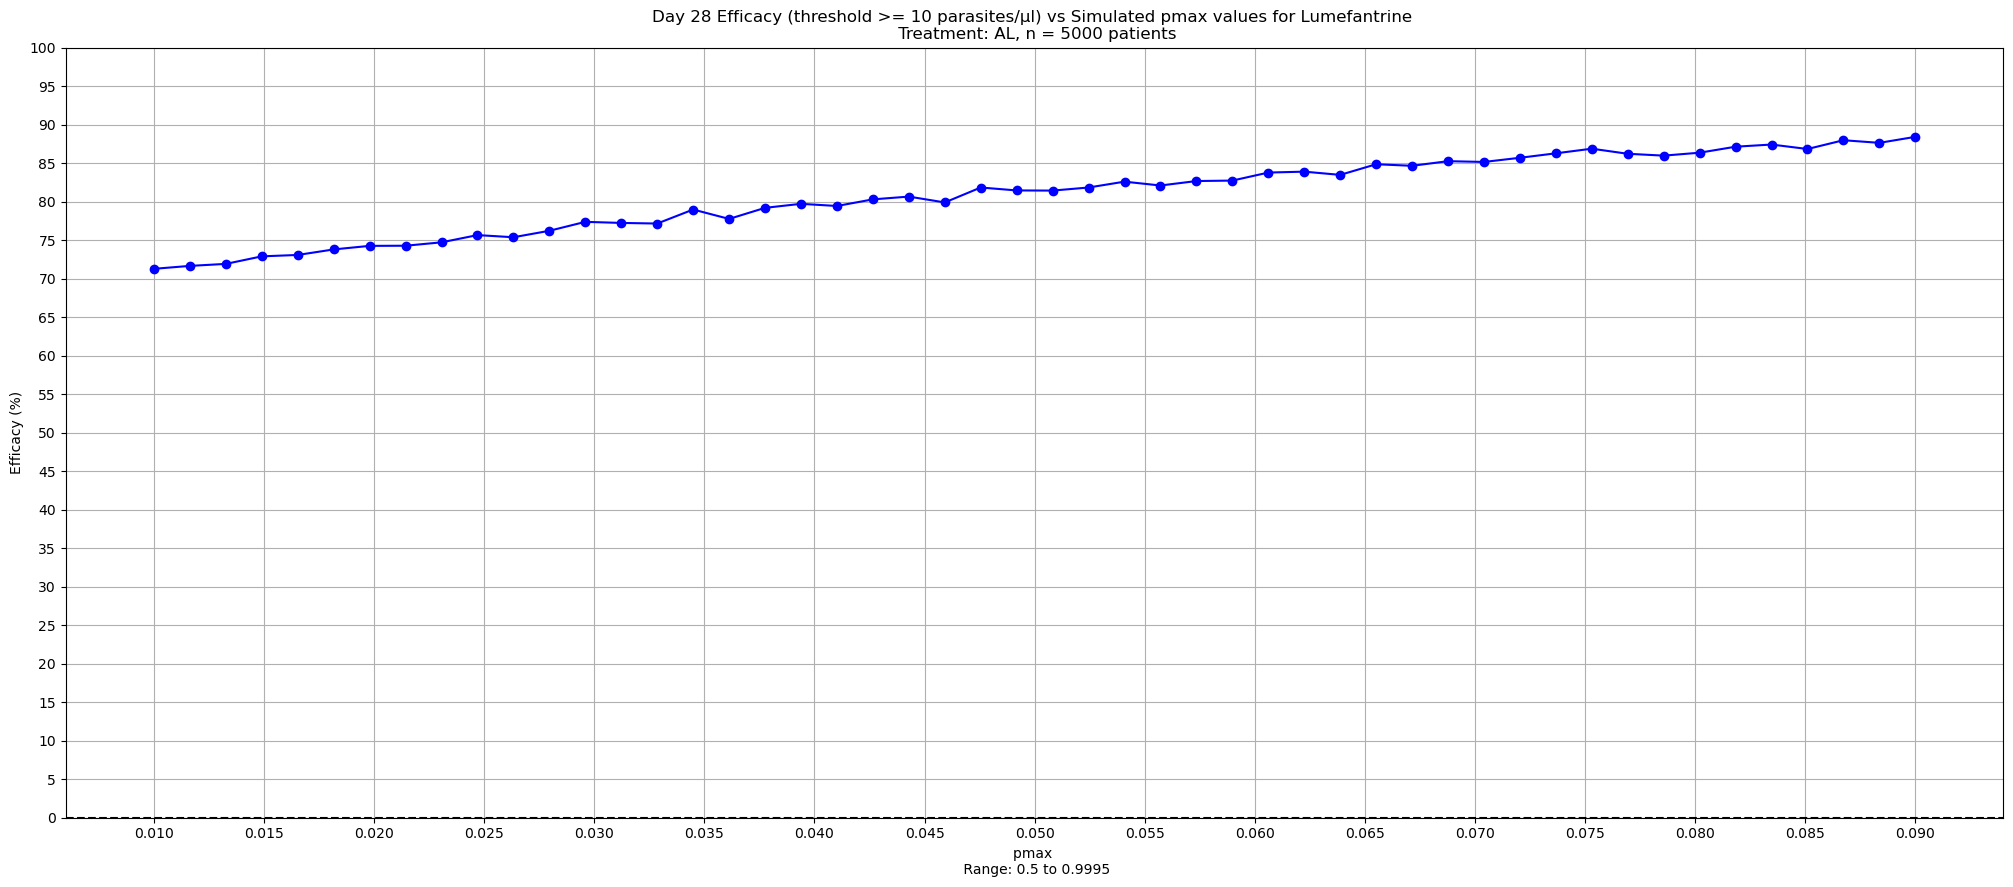

In [11]:
plt.figure(figsize=(25, 10))  # Adjust the figure size as needed
plt.plot(pmax_values, efficacy, marker='o', linestyle='-', color='b')
plt.xlabel('pmax \n Range: 0.01 to 0.09')
plt.ylabel('Efficacy (%)')
plt.title("Day 28 Efficacy (threshold >= 10 parasites/μl) vs Simulated pmax values for Lumefantrine \n Treatment: AL, n = 5000 patients")
plt.grid(True)
plt.xticks(np.arange(min(pmax_values), max(pmax_values)+0.005, 0.005))  # Adjust tick marks if necessary
plt.yticks(np.arange(0, 101, 5))  # Y-axis ticks from 0 to 100%
plt.axhline(y=0, color='k', linestyle='--')  # Optional: horizontal line at y=0
plt.savefig("pkpd_AL_pmax_lum_test_03_efficacy.png")
plt.show()

<br>

### Calculating pmax_lum with pmax_art = 0
#### Number of patients = 5000


In [12]:
# Define the range for pmax_lum
min_pmax = 0.5
max_pmax = 0.9995

# Define pmax_art values
pmax_values = np.linspace(min_pmax, max_pmax, 50)  

# Initialize a grid to store the clearance rates
efficacy = np.zeros(len(pmax_values))

In [13]:
def run_simulation(idx, pmax):
    command_pmax_art_adj = [
        "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
        "--AL",
        "-n", "5000",
        "--pmax_art", "0",
        "--pmax_lum", str(pmax),
        "-o", "1"
    ]

    try:
        # Run the command and capture output
        output_pmax_lum = subprocess.run(command_pmax_art_adj, capture_output=True, text=True, check=True)

        # Process the output
        lines_pmax_lum = output_pmax_lum.stdout.splitlines()
        df_pmax_lum = pd.DataFrame([line.split(',') for line in lines_pmax_lum], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
        # Clean the DataFrame
        df_pmax_lum = df_pmax_lum.iloc[1:].apply(pd.to_numeric, errors='coerce')

        # Calculate the efficacy
        failed_treatment_count = df_pmax_lum[(df_pmax_lum['PARASITEDENSITY'] >= 10)].shape[0]
        total_patients = df_pmax_lum['PID'].nunique()
        efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0

        return (idx, efficacy)

    except subprocess.CalledProcessError as e:
        print(f"Error in subprocess for pmax_art: {pmax}: {e}")
        return (idx, np.nan)  # Return NaN in case of failure
    except Exception as e:
        print(f"An unexpected error occurred for pmax_art: {pmax}: {e}")
        return (idx, np.nan)  # Return NaN in case of failure

# Define number of workers (use all available CPU cores)
num_workers = cpu_count()

# Prepare a list of parameters to pass to the pool
params_list = [(i, pmax_values[i]) for i in range(len(pmax_values))]

# Run simulations in parallel and track progress
with Pool(processes=num_workers) as pool:
    results = []
    with tqdm(total=len(params_list), desc="Running simulations") as pbar:
        for result in pool.starmap(run_simulation, params_list):
            results.append(result)
            pbar.update(1)  # Update progress bar after each result

# Update the clearance_rates array with the results
for idx, eff in results:
    efficacy[idx] = eff

# Create a DataFrame with pmax_values and clearance_rates
df = pd.DataFrame({
    'pmax_lum': pmax_values,
    'efficacy': efficacy
})

# Save the DataFrame to a pickle file
df.to_pickle("pkpd_AL_pmax_lum_test_04_efficacy..pyobj")

# Save the DataFrame to a CSV file
df.to_csv("pkpd_AL_pmax_lum_test_04_efficacy.csv", index=False)

print("DataFrame saved as pickle and CSV files successfully.")

Running simulations: 100%|██████████| 50/50 [16:26<00:00, 19.73s/it]   

DataFrame saved as pickle and CSV files successfully.


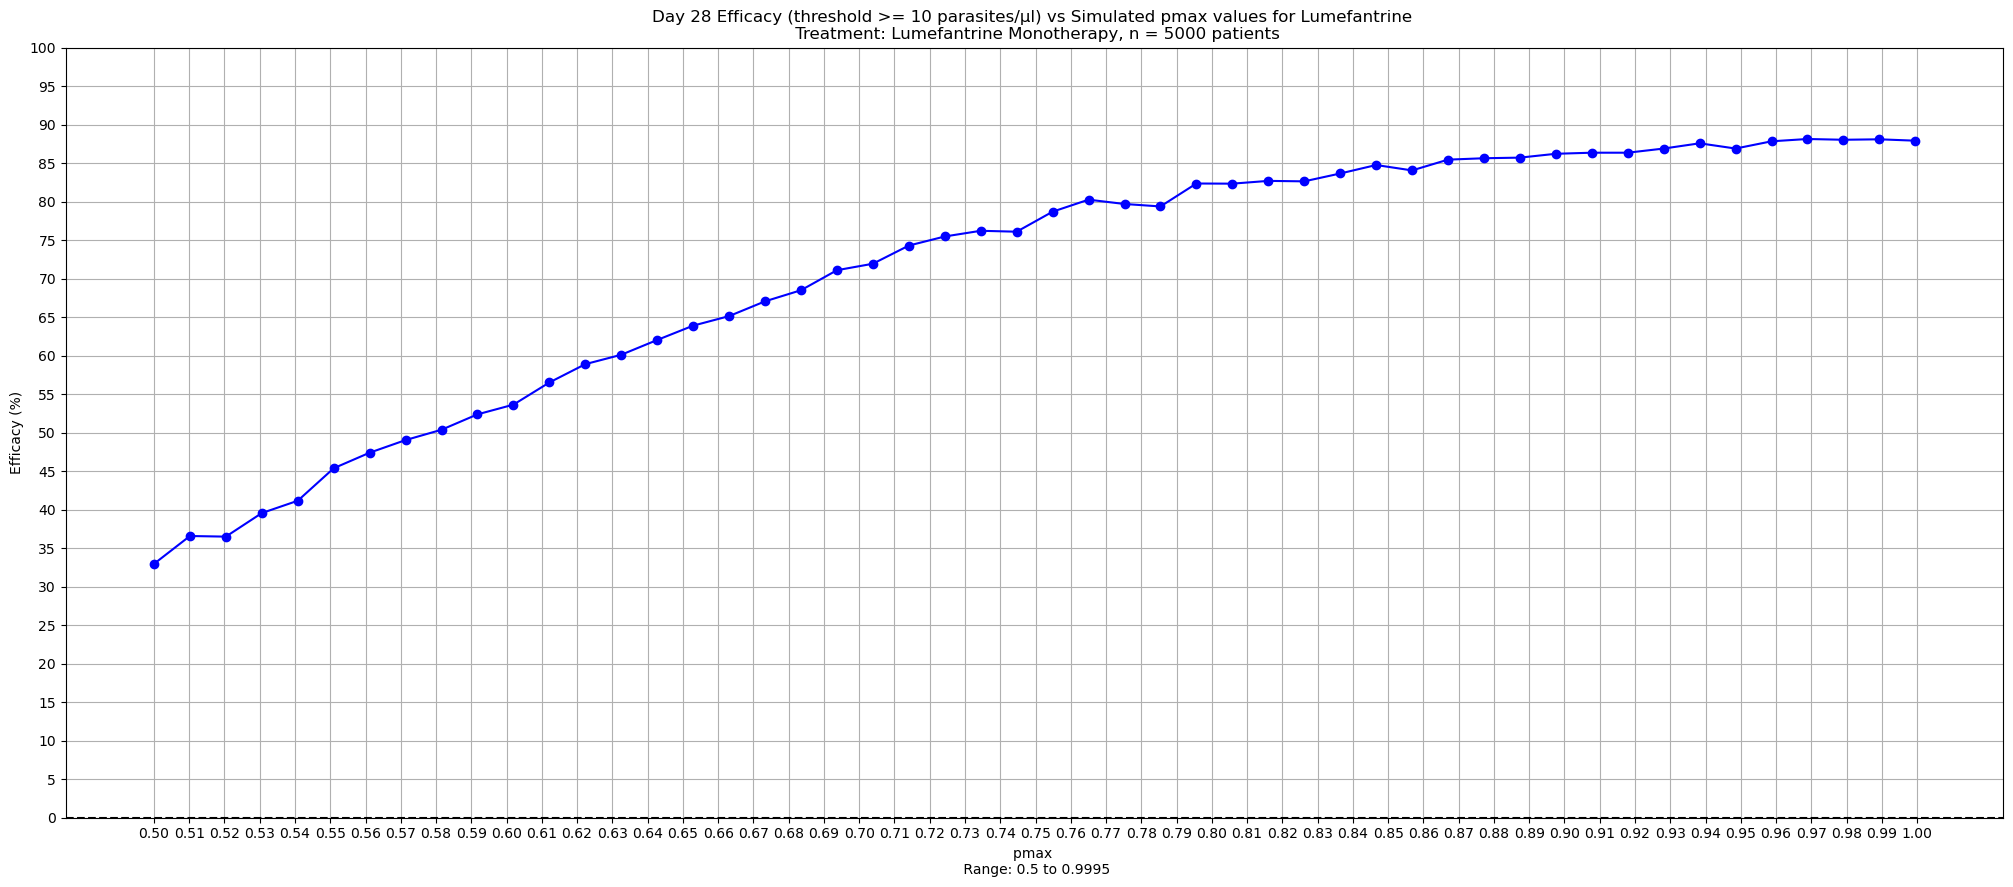

In [17]:
plt.figure(figsize=(25, 10))  # Adjust the figure size as needed
plt.plot(pmax_values, efficacy, marker='o', linestyle='-', color='b')
plt.xlabel('pmax \n Range: 0.5 to 0.9995')
plt.ylabel('Efficacy (%)')
plt.title("Day 28 Efficacy (threshold >= 10 parasites/μl) vs Simulated pmax values for Lumefantrine \n Treatment: Lumefantrine Monotherapy, n = 5000 patients")
plt.grid(True)
plt.xticks(np.arange(min(pmax_values), max(pmax_values)+0.01, 0.01))  # Adjust tick marks if necessary
plt.yticks(np.arange(0, 101, 5))  # Y-axis ticks from 0 to 100%
plt.axhline(y=0, color='k', linestyle='--')  # Optional: horizontal line at y=0
plt.savefig("pkpd_AL_pmax_lum_test_04_efficacy.png")
plt.show()

<br>

## Generating heatmap of pmax_lum and pmax_EC50 values to see how they affect clearance rates

### Test 1

In [6]:
# Setting min and max values for EC50_lum and pmax_lum
min_ec50 = 30
max_ec50 = np.exp(0.525 * np.log(2700)) # Gives 63.31

min_pmax = 0.5
max_pmax = 0.9995

# Define the range for EC50 and pmax
ec50_values = np.linspace(min_ec50, max_ec50, 25)
pmax_values = np.linspace(min_pmax, max_pmax, 25)

# Create a meshgrid for all combinations
ec50_grid, pmax_grid = np.meshgrid(ec50_values, pmax_values)
trial_efficacy = np.zeros(ec50_grid.shape)

# Flatten the grids for parallel processing
ec50_flat = ec50_grid.flatten()
pmax_flat = pmax_grid.flatten()

# Function to run a single simulation for a given (ec50, pmax) pair
def run_simulation(params):
    i, j, ec50, pmax = params

    command_ec50_pmax_lum = [
        "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
        "--AL",
        "-n", "5000",
        "--pmax_lum", str(pmax),
        "--ec50_lum", str(ec50),
        "-o", "1"
    ]

    try:
        # Run the command and capture output
        output_ec50_pmax_lum = subprocess.run(command_ec50_pmax_lum, capture_output=True, text=True, check=True)

        # Process the output
        lines_ec50_pmax_lum = output_ec50_pmax_lum.stdout.splitlines()
        df_ec50_pmax_lum = pd.DataFrame([line.split(',') for line in lines_ec50_pmax_lum], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
        # Clean the DataFrame
        df_ec50_pmax_lum = df_ec50_pmax_lum.iloc[1:].apply(pd.to_numeric, errors='coerce')

        # Calculate the efficacy
        # Here the hour filter is just to make sure the data is as expected

        failed_treatment_count = df_ec50_pmax_lum[(df_ec50_pmax_lum['PARASITEDENSITY'] >= 10) & (df_ec50_pmax_lum['HOUR'] == 671.0)].shape[0]
        total_patients = df_ec50_pmax_lum['PID'].nunique()
        efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0

        return (i, j, efficacy)

    except subprocess.CalledProcessError as e:
        print(f"Error in subprocess for EC50: {ec50}, pmax: {pmax}: {e}")
        return (i, j, np.nan)  # Return NaN in case of failure

# Define number of workers (use all available CPU cores)
num_workers = cpu_count()

# Prepare a list of parameters to pass to the pool
params_list = [(i, j, ec50_flat[i * len(pmax_values) + j], pmax_flat[i * len(pmax_values) + j])
               for i in range(len(ec50_values)) for j in range(len(pmax_values))]

# Run simulations in parallel
with Pool(processes=num_workers) as pool:
    # Use tqdm to track the progress of the parallel tasks
    results = list(tqdm(pool.imap(run_simulation, params_list), total=len(params_list)))

# Update the efficacy grid with the results
for i, j, efficacy in results:
    trial_efficacy[i, j] = efficacy

# Create a DataFrame from the efficacy grid
df_trial_efficacy = pd.DataFrame(trial_efficacy, index=pmax_values, columns=ec50_values)

# Save the DataFrame to a CSV file
df_trial_efficacy.to_csv("pkpd_AL_lum_efficacy_calibration_01.csv")

# Save the DataFrame to a pickle file
df_trial_efficacy.to_pickle("pkpd_AL_lum_efficacy_calibration_01.pyobj")

print("Parallel simulation completed and results saved in CSV and pickle formats.")


100%|██████████| 625/625 [3:16:13<00:00, 18.84s/it]  

Parallel simulation completed and results saved in CSV and pickle formats.


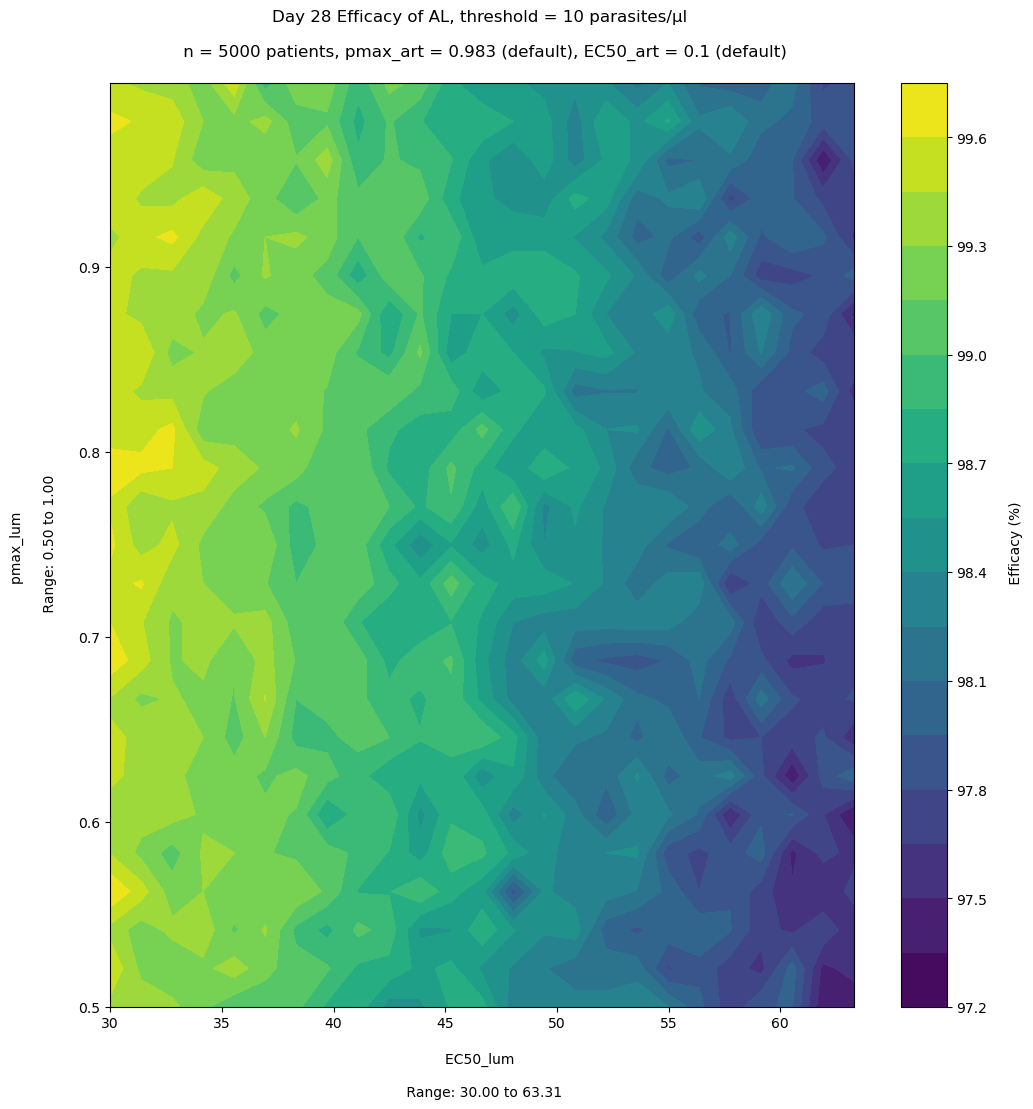

In [77]:
plt.figure(figsize=(12, 12))

# Create the contour plot
contour = plt.contourf(ec50_grid, pmax_grid, df_trial_efficacy, levels=20, cmap='viridis')

# Create the colorbar
cbar = plt.colorbar(contour)
cbar.set_label('\n Efficacy (%)')

# Set the labels and title
plt.xlabel('\nEC50_lum \n\n Range: {:.2f} to {:.2f}'.format(min_ec50, max_ec50))
plt.ylabel('pmax_lum \n\n Range: {:.2f} to {:.2f}\n'.format(min_pmax, max_pmax))
plt.title('Day 28 Efficacy of AL, threshold = 10 parasites/μl \n\n n = 5000 patients, pmax_art = 0.983 (default), EC50_art = 0.1 (default)\n')

#Save plot
plt.savefig("pkpd_AL_lum_efficacy_calibration_contour_01.png")
# Show the plot
plt.show()

In [18]:
# Setting min and max values for EC50_lum and pmax_lum
min_ec50 = 30
max_ec50 = np.exp(0.525 * np.log(2700)) # Gives 63.31

min_pmax = 0.5
max_pmax = 0.9995

# Define the range for EC50 and pmax
ec50_values = np.linspace(min_ec50, max_ec50, 25)
pmax_values = np.linspace(min_pmax, max_pmax, 25)

# Create a meshgrid for all combinations
ec50_grid, pmax_grid = np.meshgrid(ec50_values, pmax_values)

In [19]:
print("pmax_lum Range: ",pmax_values)

pmax_lum Range:  [0.5       0.5208125 0.541625  0.5624375 0.58325   0.6040625 0.624875
 0.6456875 0.6665    0.6873125 0.708125  0.7289375 0.74975   0.7705625
 0.791375  0.8121875 0.833     0.8538125 0.874625  0.8954375 0.91625
 0.9370625 0.957875  0.9786875 0.9995   ]


In [21]:
print("EC50_lum Range: ",ec50_values)

EC50_lum Range:  [30.         31.38787817 32.77575635 34.16363452 35.5515127  36.93939087
 38.32726904 39.71514722 41.10302539 42.49090356 43.87878174 45.26665991
 46.65453809 48.04241626 49.43029443 50.81817261 52.20605078 53.59392895
 54.98180713 56.3696853  57.75756348 59.14544165 60.53331982 61.921198
 63.30907617]


In [22]:
np.savetxt('pkpd_AL_lum_efficacy_calibration_pmax_range_01.txt', pmax_values, delimiter=',', fmt='%5f')
np.savetxt('pkpd_AL_lum_efficacy_calibration_ec50_range_01.txt', ec50_values, delimiter=',', fmt='%5f')

In [ ]:
#Loading EC50_lum x pmax_lum data 
df_trial_efficacy = pd.read_pickle("pkpd_AL_lum_efficacy_calibration_01.pyobj")

In [ ]:
df_trial_efficacy.head() # Rows correspond to pmax_lum values and columns correspond to EC50_lum values

,30.000000,31.387878,32.775756,34.163635,35.551513,36.939391,38.327269,39.715147,41.103025,42.490904,...,50.818173,52.206051,53.593929,54.981807,56.369685,57.757563,59.145442,60.533320,61.921198,63.309076
0.500000,99.40,99.40,99.34,99.18,99.04,99.04,99.04,98.82,98.78,98.48,...,98.32,98.30,98.38,98.26,98.00,97.70,97.94,97.96,97.38,97.38
0.520813,99.58,99.26,99.18,99.26,99.38,99.20,99.06,99.02,98.82,98.80,...,98.16,98.18,98.18,97.78,97.90,97.72,97.60,98.02,97.46,97.56
0.541625,99.40,99.22,99.34,99.40,99.12,99.32,98.96,98.80,99.04,98.94,...,98.48,98.02,97.92,98.04,98.06,97.96,97.70,97.62,97.78,97.52
0.562438,99.74,99.52,99.22,99.30,99.30,99.16,99.28,99.12,98.84,98.84,...,98.34,98.32,98.24,98.06,97.80,97.94,97.72,97.52,97.50,97.72
0.583250,99.44,99.26,99.08,99.32,99.30,99.16,99.12,99.08,98.96,98.84,...,98.34,98.40,98.42,97.86,97.76,97.88,98.02,97.46,97.70,97.60


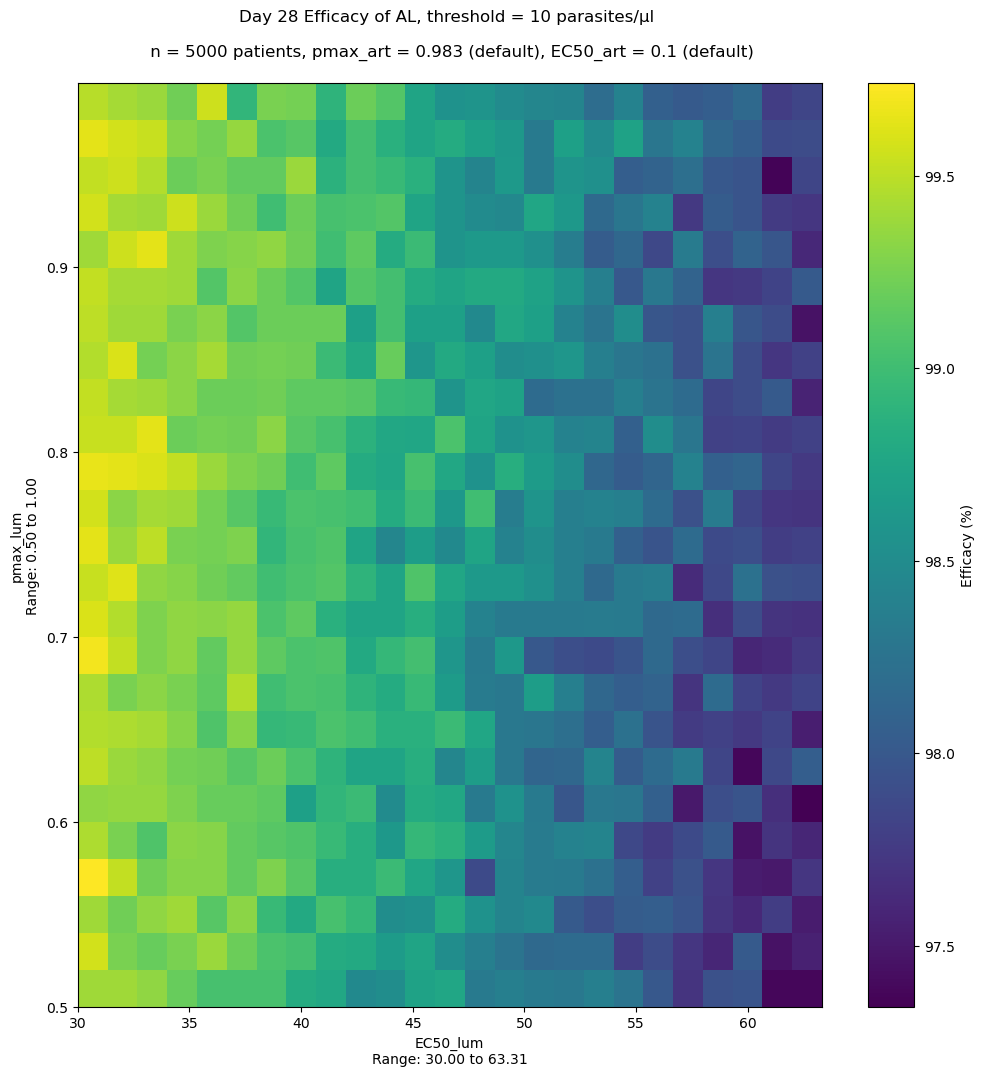

In [12]:

plt.figure(figsize=(12, 12))

plt.imshow(df_trial_efficacy, extent=(min_ec50, max_ec50, min_pmax, max_pmax), origin='lower', cmap='viridis', aspect = 'auto')

# Create the colorbar
plt.colorbar(label='Efficacy (%)')

# Set the labels and title
plt.xlabel('EC50_lum\nRange: {:.2f} to {:.2f}'.format(min_ec50, max_ec50))
plt.ylabel('pmax_lum\nRange: {:.2f} to {:.2f}'.format(min_pmax, max_pmax))
plt.title('Day 28 Efficacy of AL, threshold = 10 parasites/μl \n\n n = 5000 patients, pmax_art = 0.983 (default), EC50_art = 0.1 (default)\n')

#Save plot
plt.savefig("pkpd_AL_lum_efficacy_calibration_heatmap_01.png")
# Show the plot
plt.show()

#### Note : AL Max Efficacy: 96.5% (genotype sensitive to both ART and LUM)
#### Finding the EC50/pmax_lum concentration at which efficacy of AL = 96.5% using data from Test 1

In [22]:
df_trial_efficacy = pd.read_pickle("pkpd_AL_lum_efficacy_calibration_01.pyobj")

df_trial_efficacy.head() # Rows correspond to pmax_lum values and columns correspond to EC50_lum values

,30.000000,31.387878,32.775756,34.163635,35.551513,36.939391,38.327269,39.715147,41.103025,42.490904,...,50.818173,52.206051,53.593929,54.981807,56.369685,57.757563,59.145442,60.533320,61.921198,63.309076
0.500000,99.40,99.40,99.34,99.18,99.04,99.04,99.04,98.82,98.78,98.48,...,98.32,98.30,98.38,98.26,98.00,97.70,97.94,97.96,97.38,97.38
0.520813,99.58,99.26,99.18,99.26,99.38,99.20,99.06,99.02,98.82,98.80,...,98.16,98.18,98.18,97.78,97.90,97.72,97.60,98.02,97.46,97.56
0.541625,99.40,99.22,99.34,99.40,99.12,99.32,98.96,98.80,99.04,98.94,...,98.48,98.02,97.92,98.04,98.06,97.96,97.70,97.62,97.78,97.52
0.562438,99.74,99.52,99.22,99.30,99.30,99.16,99.28,99.12,98.84,98.84,...,98.34,98.32,98.24,98.06,97.80,97.94,97.72,97.52,97.50,97.72
0.583250,99.44,99.26,99.08,99.32,99.30,99.16,99.12,99.08,98.96,98.84,...,98.34,98.40,98.42,97.86,97.76,97.88,98.02,97.46,97.70,97.60


In [28]:
#Reformatting table for better readability

df_trial_efficacy_edited = pd.DataFrame(df_trial_efficacy.stack(), columns=['Efficacy (%)'])
df_trial_efficacy_edited.index.names = ['pmax_lum', 'EC50_lum']
df_trial_efficacy_edited.reset_index(inplace=True)
df_trial_efficacy_edited

,pmax_lum,EC50_lum,Efficacy (%)
0,0.5000,30.000000,99.40
1,0.5000,31.387878,99.40
2,0.5000,32.775756,99.34
3,0.5000,34.163635,99.18
4,0.5000,35.551513,99.04
...,...,...,...
620,0.9995,57.757563,98.02
621,0.9995,59.145442,98.06
622,0.9995,60.533320,98.16
623,0.9995,61.921198,97.78


In [29]:
#Filtering effiacy values between 96 and 97%
df_trial_efficacy_filtered = df_trial_efficacy_edited[(df_trial_efficacy_edited['Efficacy (%)'] >= 96) & (df_trial_efficacy_edited['Efficacy (%)'] <= 97)]
df_trial_efficacy_filtered

,pmax_lum,EC50_lum,Efficacy (%)


#### Results: EC50 range too low, repeating test as Test 2 with a higher range for ec50_lum 
<br>

### Test 2

In [25]:
# Setting min and max values for EC50_lum and pmax_lum
min_ec50 = 60 #Default: np.exp(0.525 * np.log(2700)) gives 63.31
max_ec50 = 200

min_pmax = 0.5
max_pmax = 0.9995

# Define the range for EC50 and pmax
ec50_values = np.linspace(min_ec50, max_ec50, 25)
pmax_values = np.linspace(min_pmax, max_pmax, 25)

#Saving EC50_lum and pmax_lum range for future reference
np.savetxt('pkpd_AL_lum_efficacy_calibration_pmax_range_02.txt', pmax_values, delimiter=',', fmt='%5f')
np.savetxt('pkpd_AL_lum_efficacy_calibration_ec50_range_02.txt', ec50_values, delimiter=',', fmt='%5f')

# Create a meshgrid for all combinations
ec50_grid, pmax_grid = np.meshgrid(ec50_values, pmax_values)
trial_efficacy = np.zeros(ec50_grid.shape)

# Flatten the grids for parallel processing
ec50_flat = ec50_grid.flatten()
pmax_flat = pmax_grid.flatten()

#Checking pmax_lum, ec50_lum by eye
print("pmax_lum Range: ",pmax_values)
print("EC50_lum Range: ",ec50_values)

pmax_lum Range:  [0.5       0.5208125 0.541625  0.5624375 0.58325   0.6040625 0.624875
 0.6456875 0.6665    0.6873125 0.708125  0.7289375 0.74975   0.7705625
 0.791375  0.8121875 0.833     0.8538125 0.874625  0.8954375 0.91625
 0.9370625 0.957875  0.9786875 0.9995   ]
EC50_lum Range:  [ 60.          65.83333333  71.66666667  77.5         83.33333333
  89.16666667  95.         100.83333333 106.66666667 112.5
 118.33333333 124.16666667 130.         135.83333333 141.66666667
 147.5        153.33333333 159.16666667 165.         170.83333333
 176.66666667 182.5        188.33333333 194.16666667 200.        ]


In [26]:
# Function to run a single simulation for a given (ec50, pmax) pair
def run_simulation(params):
    i, j, ec50, pmax = params

    command_ec50_pmax_lum = [
        "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
        "--AL",
        "-n", "5000",
        "--pmax_lum", str(pmax),
        "--ec50_lum", str(ec50),
        "-o", "1"
    ]

    try:
        # Run the command and capture output
        output_ec50_pmax_lum = subprocess.run(command_ec50_pmax_lum, capture_output=True, text=True, check=True)

        # Process the output
        lines_ec50_pmax_lum = output_ec50_pmax_lum.stdout.splitlines()
        df_ec50_pmax_lum = pd.DataFrame([line.split(',') for line in lines_ec50_pmax_lum], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
        # Clean the DataFrame
        df_ec50_pmax_lum = df_ec50_pmax_lum.iloc[1:].apply(pd.to_numeric, errors='coerce')

        # Calculate the efficacy
        # Here the hour filter is just to make sure the data is as expected

        failed_treatment_count = df_ec50_pmax_lum[(df_ec50_pmax_lum['PARASITEDENSITY'] >= 10) & (df_ec50_pmax_lum['HOUR'] == 671.0)].shape[0]
        total_patients = df_ec50_pmax_lum['PID'].nunique()
        efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0

        return (i, j, efficacy)

    except subprocess.CalledProcessError as e:
        print(f"Error in subprocess for EC50: {ec50}, pmax: {pmax}: {e}")
        return (i, j, np.nan)  # Return NaN in case of failure

# Define number of workers (use all available CPU cores)
num_workers = cpu_count()

# Prepare a list of parameters to pass to the pool
params_list = [(i, j, ec50_flat[i * len(pmax_values) + j], pmax_flat[i * len(pmax_values) + j])
               for i in range(len(ec50_values)) for j in range(len(pmax_values))]

# Run simulations in parallel
with Pool(processes=num_workers) as pool:
    # Use tqdm to track the progress of the parallel tasks
    results = list(tqdm(pool.imap(run_simulation, params_list), total=len(params_list)))

# Update the efficacy grid with the results
for i, j, efficacy in results:
    trial_efficacy[i, j] = efficacy

# Create a DataFrame from the efficacy grid
df_trial_efficacy = pd.DataFrame(trial_efficacy, index=pmax_values, columns=ec50_values)

# Save the DataFrame to a CSV file
df_trial_efficacy.to_csv("pkpd_AL_lum_efficacy_calibration_02.csv")

# Save the DataFrame to a pickle file
df_trial_efficacy.to_pickle("pkpd_AL_lum_efficacy_calibration_02.pyobj")

print("Parallel simulation completed and results saved in CSV and pickle formats.")


100%|██████████| 625/625 [3:38:29<00:00, 20.98s/it]  

Parallel simulation completed and results saved in CSV and pickle formats.


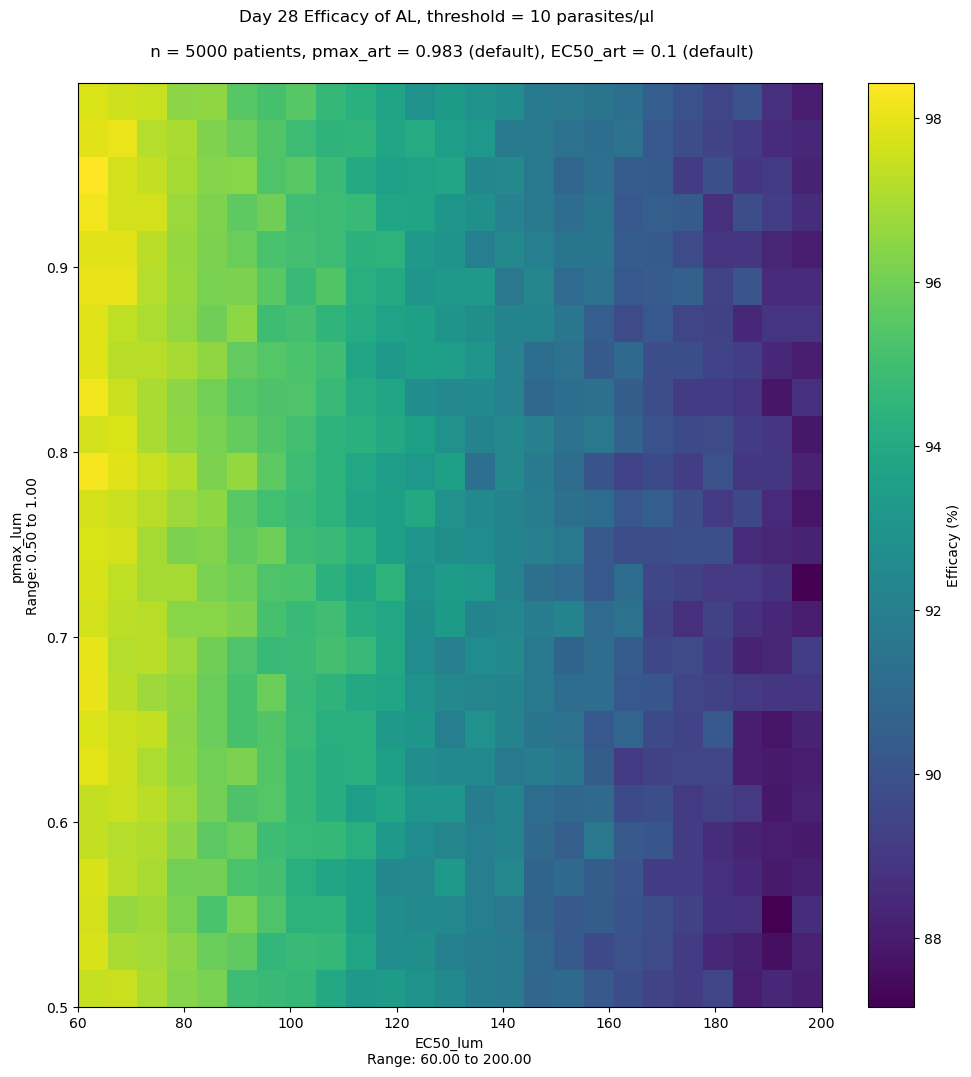

In [27]:

plt.figure(figsize=(12, 12))

plt.imshow(df_trial_efficacy, extent=(min_ec50, max_ec50, min_pmax, max_pmax), origin='lower', cmap='viridis', aspect = 'auto')

# Create the colorbar
plt.colorbar(label='Efficacy (%)')

# Set the labels and title
plt.xlabel('EC50_lum\nRange: {:.2f} to {:.2f}'.format(min_ec50, max_ec50))
plt.ylabel('pmax_lum\nRange: {:.2f} to {:.2f}'.format(min_pmax, max_pmax))
plt.title('Day 28 Efficacy of AL, threshold = 10 parasites/μl \n\n n = 5000 patients, pmax_art = 0.983 (default), EC50_art = 0.1 (default)\n')

#Save plot
plt.savefig("pkpd_AL_lum_efficacy_calibration_heatmap_02.png")
# Show the plot
plt.show()

#### Note : AL Max Efficacy: 96.5% (genotype sensitive to both ART and LUM)
#### Finding the EC50/pmax_lum concentration at which efficacy of AL = 96.5% using data from Test 2

In [3]:
df_trial_efficacy = pd.read_pickle("pkpd_AL_lum_efficacy_calibration_02.pyobj")

df_trial_efficacy.head() # Rows correspond to pmax_lum values and columns correspond to EC50_lum values

,60.000000,65.833333,71.666667,77.500000,83.333333,89.166667,95.000000,100.833333,106.666667,112.500000,...,147.500000,153.333333,159.166667,165.000000,170.833333,176.666667,182.500000,188.333333,194.166667,200.000000
0.500000,97.44,97.52,97.00,96.36,96.14,94.94,94.78,94.68,93.94,93.24,...,90.86,91.06,90.30,89.88,89.46,89.18,89.50,88.08,88.42,88.12
0.520813,97.74,97.00,96.86,96.48,95.86,95.66,94.60,94.80,94.64,93.82,...,90.96,90.34,89.64,89.96,89.76,89.10,88.46,88.14,87.60,88.20
0.541625,97.70,96.66,96.80,96.16,95.22,96.16,95.30,94.42,94.42,93.54,...,90.76,90.32,90.46,90.08,89.80,89.38,88.80,88.70,87.18,88.64
0.562438,97.76,97.26,96.98,96.04,96.06,95.22,95.08,94.26,93.78,93.54,...,90.80,91.02,90.46,90.12,89.14,89.14,88.72,88.46,87.98,88.16
0.583250,97.38,97.16,97.06,96.46,95.58,95.86,94.94,94.70,94.64,94.26,...,91.04,90.58,91.66,90.30,90.16,89.10,88.64,88.24,88.04,87.98


In [4]:
#Reformatting table for better readability

df_trial_efficacy_edited = pd.DataFrame(df_trial_efficacy.stack(), columns=['Efficacy (%)'])
df_trial_efficacy_edited.index.names = ['pmax_lum', 'EC50_lum']
df_trial_efficacy_edited.reset_index(inplace=True)

#Filtering effiacy values between 96 and 97%
df_trial_efficacy_filtered = df_trial_efficacy_edited[(df_trial_efficacy_edited['Efficacy (%)'] >= 96.5) & (df_trial_efficacy_edited['Efficacy (%)'] <= 96.6)]
df_trial_efficacy_filtered.to_csv("pkpd_AL_lum_efficacy_calibration_02_filtered.csv")
df_trial_efficacy_filtered

,pmax_lum,EC50_lum,Efficacy (%)
153,0.624875,77.500000,96.50
203,0.666500,77.500000,96.54
329,0.770563,83.333333,96.50
378,0.812188,77.500000,96.52
429,0.853813,83.333333,96.54
453,0.874625,77.500000,96.60
455,0.874625,89.166667,96.52
604,0.999500,83.333333,96.56


## pmax_lum and ec50_lum corresponding to 96.5% efficacy given AL
## pmax_lum = 0.770563
## ec50_lum = 83.333333	

<br>

### Test 3: Lumefantrine Monotherapy

In [2]:
# Setting min and max values for EC50_lum and pmax_lum
min_ec50 = 30 #Default: np.exp(0.525 * np.log(2700)) gives 63.31
max_ec50 = 200

min_pmax = 0.5
max_pmax = 0.9995

# Define the range for EC50 and pmax
ec50_values = np.linspace(min_ec50, max_ec50, 25)
pmax_values = np.linspace(min_pmax, max_pmax, 25)

#Saving EC50_lum and pmax_lum range for future reference
np.savetxt('pkpd_AL_lum_efficacy_calibration_pmax_range_03.txt', pmax_values, delimiter=',', fmt='%5f')
np.savetxt('pkpd_AL_lum_efficacy_calibration_ec50_range_03.txt', ec50_values, delimiter=',', fmt='%5f')

# Create a meshgrid for all combinations
ec50_grid, pmax_grid = np.meshgrid(ec50_values, pmax_values)
trial_efficacy = np.zeros(ec50_grid.shape)

# Flatten the grids for parallel processing
ec50_flat = ec50_grid.flatten()
pmax_flat = pmax_grid.flatten()

#Checking pmax_lum, ec50_lum by eye
print("pmax_lum Range: ",pmax_values)
print("EC50_lum Range: ",ec50_values)

pmax_lum Range:  [0.5       0.5208125 0.541625  0.5624375 0.58325   0.6040625 0.624875
 0.6456875 0.6665    0.6873125 0.708125  0.7289375 0.74975   0.7705625
 0.791375  0.8121875 0.833     0.8538125 0.874625  0.8954375 0.91625
 0.9370625 0.957875  0.9786875 0.9995   ]
EC50_lum Range:  [ 30.          37.08333333  44.16666667  51.25        58.33333333
  65.41666667  72.5         79.58333333  86.66666667  93.75
 100.83333333 107.91666667 115.         122.08333333 129.16666667
 136.25       143.33333333 150.41666667 157.5        164.58333333
 171.66666667 178.75       185.83333333 192.91666667 200.        ]


In [3]:
# Function to run a single simulation for a given (ec50, pmax) pair
def run_simulation(params):
    i, j, ec50, pmax = params

    command_ec50_pmax_lum = [
        "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
        "--AL",
        "-n", "5000",
        "--pmax_art", "0",
        "--pmax_lum", str(pmax),
        "--ec50_lum", str(ec50),
        "-o", "1"
    ]

    try:
        # Run the command and capture output
        output_ec50_pmax_lum = subprocess.run(command_ec50_pmax_lum, capture_output=True, text=True, check=True)

        # Process the output
        lines_ec50_pmax_lum = output_ec50_pmax_lum.stdout.splitlines()
        df_ec50_pmax_lum = pd.DataFrame([line.split(',') for line in lines_ec50_pmax_lum], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
        # Clean the DataFrame
        df_ec50_pmax_lum = df_ec50_pmax_lum.iloc[1:].apply(pd.to_numeric, errors='coerce')

        # Calculate the efficacy
        # Here the hour filter is just to make sure the data is as expected

        failed_treatment_count = df_ec50_pmax_lum[(df_ec50_pmax_lum['PARASITEDENSITY'] >= 10) & (df_ec50_pmax_lum['HOUR'] == 671.0)].shape[0]
        total_patients = df_ec50_pmax_lum['PID'].nunique()
        efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0

        return (i, j, efficacy)

    except subprocess.CalledProcessError as e:
        print(f"Error in subprocess for EC50: {ec50}, pmax: {pmax}: {e}")
        return (i, j, np.nan)  # Return NaN in case of failure

# Define number of workers (use all available CPU cores)
num_workers = cpu_count()

# Prepare a list of parameters to pass to the pool
params_list = [(i, j, ec50_flat[i * len(pmax_values) + j], pmax_flat[i * len(pmax_values) + j])
               for i in range(len(ec50_values)) for j in range(len(pmax_values))]

# Run simulations in parallel
with Pool(processes=num_workers) as pool:
    # Use tqdm to track the progress of the parallel tasks
    results = list(tqdm(pool.imap(run_simulation, params_list), total=len(params_list)))

# Update the efficacy grid with the results
for i, j, efficacy in results:
    trial_efficacy[i, j] = efficacy

# Create a DataFrame from the efficacy grid
df_trial_efficacy = pd.DataFrame(trial_efficacy, index=pmax_values, columns=ec50_values)

# Save the DataFrame to a CSV file
df_trial_efficacy.to_csv("pkpd_AL_lum_efficacy_calibration_03.csv")

# Save the DataFrame to a pickle file
df_trial_efficacy.to_pickle("pkpd_AL_lum_efficacy_calibration_03.pyobj")

print("Parallel simulation completed and results saved in CSV and pickle formats.")


100%|██████████| 625/625 [4:39:44<00:00, 26.86s/it]  

Parallel simulation completed and results saved in CSV and pickle formats.


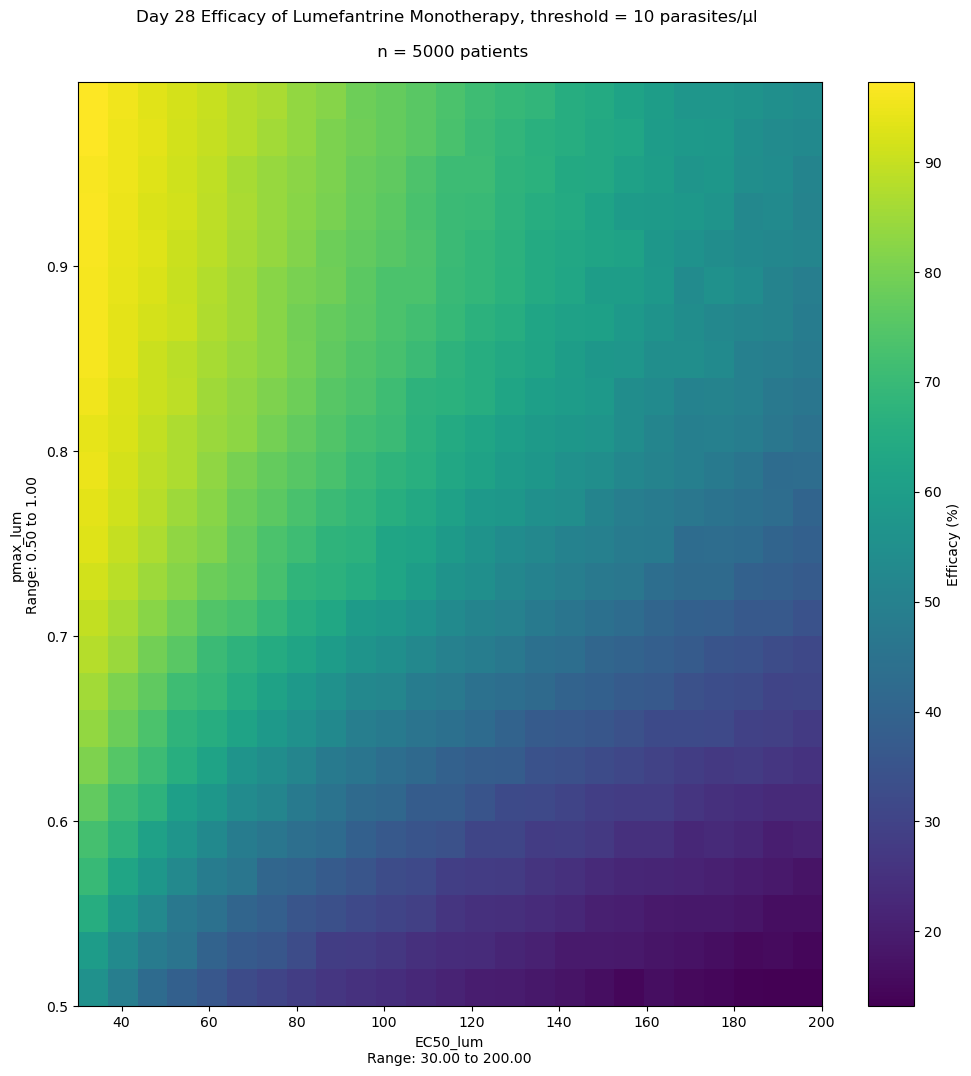

In [4]:

plt.figure(figsize=(12, 12))

plt.imshow(df_trial_efficacy, extent=(min_ec50, max_ec50, min_pmax, max_pmax), origin='lower', cmap='viridis', aspect = 'auto')

# Create the colorbar
plt.colorbar(label='Efficacy (%)')

# Set the labels and title
plt.xlabel('EC50_lum\nRange: {:.2f} to {:.2f}'.format(min_ec50, max_ec50))
plt.ylabel('pmax_lum\nRange: {:.2f} to {:.2f}'.format(min_pmax, max_pmax))
plt.title('Day 28 Efficacy of Lumefantrine Monotherapy, threshold = 10 parasites/μl \n\n n = 5000 patients\n')

#Save plot
plt.savefig("pkpd_AL_lum_efficacy_calibration_heatmap_03.png")
# Show the plot
plt.show()

#### Note : Lumefantrine Monotherapy Max Efficacy: 87% (fully sensitive genotype)
#### Finding the EC50/pmax_lum concentration at which efficacy of Lumefantrine Monotherapy = 87%

In [5]:
df_trial_efficacy = pd.read_pickle("pkpd_AL_lum_efficacy_calibration_03.pyobj")

df_trial_efficacy.head() # Rows correspond to pmax_lum values and columns correspond to EC50_lum values

,30.000000,37.083333,44.166667,51.250000,58.333333,65.416667,72.500000,79.583333,86.666667,93.750000,...,136.250000,143.333333,150.416667,157.500000,164.583333,171.666667,178.750000,185.833333,192.916667,200.000000
0.500000,55.80,48.98,42.62,38.94,35.94,32.44,30.58,28.50,26.46,25.08,...,18.46,17.50,16.46,14.80,16.30,15.34,14.66,13.76,13.28,13.18
0.520813,59.80,53.50,48.08,45.52,40.10,37.14,35.74,32.56,28.60,28.26,...,20.74,19.22,19.38,18.82,17.78,17.44,16.42,15.22,15.80,14.68
0.541625,65.54,58.06,52.78,46.74,44.54,40.62,38.48,35.44,33.70,31.58,...,23.58,22.40,20.66,20.38,18.98,18.74,18.50,17.94,16.34,16.32
0.562438,69.72,62.62,57.64,52.76,48.40,46.16,40.96,39.86,37.18,35.20,...,25.72,24.86,23.22,22.14,22.00,21.40,20.52,19.72,18.98,17.76
0.583250,72.48,67.56,61.32,56.92,53.14,48.58,46.20,43.94,42.62,38.96,...,28.16,28.48,27.10,24.70,24.96,22.38,23.32,22.10,20.38,20.88


In [6]:
#Reformatting table for better readability

df_trial_efficacy_edited = pd.DataFrame(df_trial_efficacy.stack(), columns=['Efficacy (%)'])
df_trial_efficacy_edited.index.names = ['pmax_lum', 'EC50_lum']
df_trial_efficacy_edited.reset_index(inplace=True)

#Filtering effiacy values between 85 and 90%
df_trial_efficacy_filtered = df_trial_efficacy_edited[(df_trial_efficacy_edited['Efficacy (%)'] >= 87) & (df_trial_efficacy_edited['Efficacy (%)'] <= 88)]

df_trial_efficacy_filtered.to_csv("pkpd_AL_lum_efficacy_calibration_03_filtered.csv")
df_trial_efficacy_filtered

,pmax_lum,EC50_lum,Efficacy (%)
225,0.687312,30.000000,87.88
378,0.812188,51.250000,87.02
454,0.874625,58.333333,87.30
479,0.895437,58.333333,87.64
580,0.978688,65.416667,87.84
605,0.999500,65.416667,87.98


## pmax_lum and ec50_lum corresponding to 87% efficacy given Lumefantrine Monotherapy 
## pmax_lum = 0.812188
## ec50_lum = 51.25

<br>

### Test 4: Lumefantrine Monotherapy, adjusting ec50_lum with default value for pmax_lum

In [30]:
# Define the range for ec50_lum
min_ec50 = 30
max_ec50 = 200

# Define pmax_art values
ec50_values = np.linspace(min_ec50, max_ec50, 50)  
ec50_values

#Saving EC50_lum for future reference
np.savetxt('pkpd_AL_lum_efficacy_calibration_ec50_range_04.txt', ec50_values, delimiter=',', fmt='%5f')

# Initialize a grid to store the clearance rates
trial_efficacy = np.zeros(len(ec50_values))

In [31]:
def run_simulation(idx, ec50):
    command_ec50_lum_adj = [
        "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
        "--AL",
        "-n", "5000",
        "--pmax_art", "0",
        "--ec50_lum", str(ec50),
        "-o", "1"
    ]

    try:
        # Run the command and capture output
        output_ec50_lum = subprocess.run(command_ec50_lum_adj, capture_output=True, text=True, check=True)

        # Process the output
        lines_ec50_lum = output_ec50_lum.stdout.splitlines()
        df_ec50_lum = pd.DataFrame([line.split(',') for line in lines_ec50_lum], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
        # Clean the DataFrame
        df_ec50_lum = df_ec50_lum.iloc[1:].apply(pd.to_numeric, errors='coerce')

        # Calculate the efficacy
        failed_treatment_count = df_ec50_lum[(df_ec50_lum['PARASITEDENSITY'] >= 10)].shape[0]
        total_patients = df_ec50_lum['PID'].nunique()
        efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0

        return (idx, efficacy)

    except subprocess.CalledProcessError as e:
        print(f"Error in subprocess for ec50_lum: {ec50}: {e}")
        return (idx, np.nan)  # Return NaN in case of failure
    except Exception as e:
        print(f"An unexpected error occurred for pmax_art: {ec50}: {e}")
        return (idx, np.nan)  # Return NaN in case of failure

# Define number of workers (use all available CPU cores)
num_workers = cpu_count()

# Prepare a list of parameters to pass to the pool
params_list = [(i, ec50_values[i]) for i in range(len(ec50_values))]

# Run simulations in parallel and track progress
with Pool(processes=num_workers) as pool:
    results = []
    with tqdm(total=len(params_list), desc="Running simulations") as pbar:
        for result in pool.starmap(run_simulation, params_list):
            results.append(result)
            pbar.update(1)  # Update progress bar after each result

# Update the clearance_rates array with the results
for idx, efficacy in results:
    trial_efficacy[idx] = efficacy

# Create a DataFrame with pmax_values and clearance_rates
df = pd.DataFrame({
    'ec50_lum': ec50_values,
    'efficacy': trial_efficacy
})

# Save the DataFrame to a pickle file
df.to_pickle("pkpd_AL_lum_efficacy_calibration_04.pyobj")

# Save the DataFrame to a CSV file
df.to_csv("pkpd_AL_lum_efficacy_calibration_04.csv", index=False)

print("DataFrame saved as pickle and CSV files successfully.")

Running simulations: 100%|██████████| 50/50 [19:19<00:00, 23.20s/it]    

DataFrame saved as pickle and CSV files successfully.


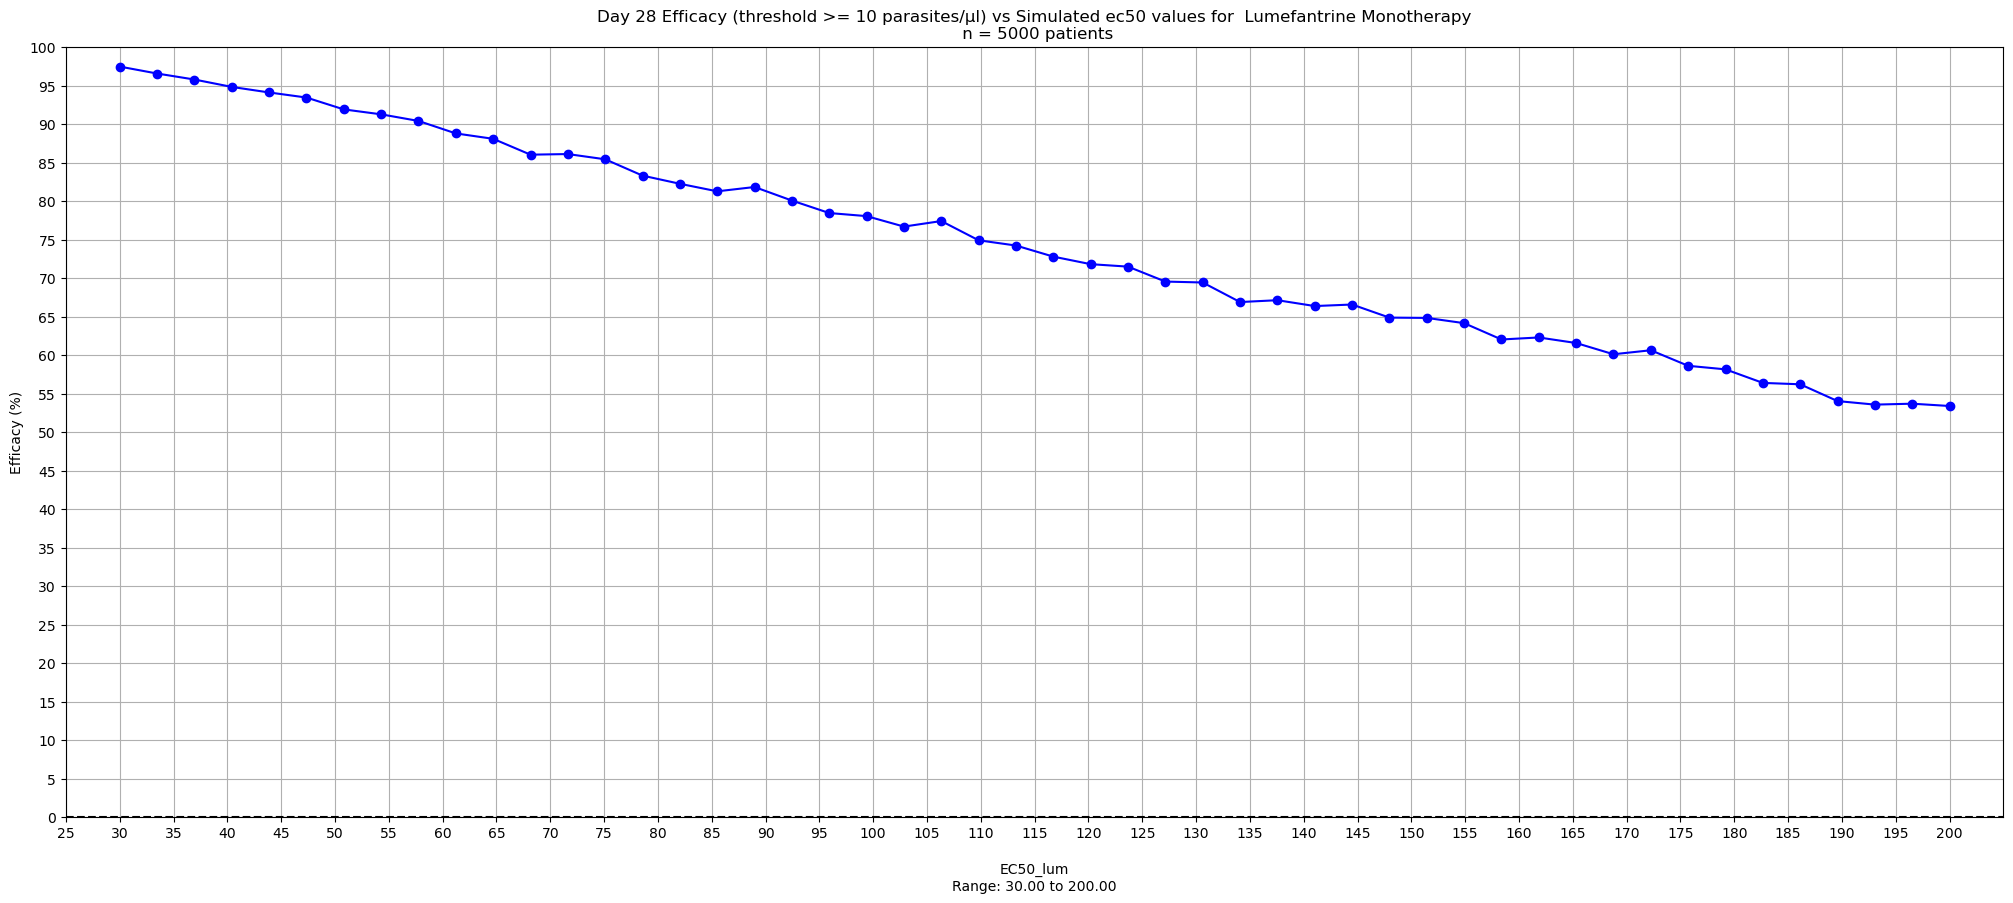

In [48]:
plt.figure(figsize=(25, 10))  # Adjust the figure size as needed
plt.plot(ec50_values, trial_efficacy, marker='o', linestyle='-', color='b')
plt.xlabel('\nEC50_lum\nRange: {:.2f} to {:.2f}'.format(min_ec50, max_ec50))
plt.ylabel('Efficacy (%)')
plt.title("Day 28 Efficacy (threshold >= 10 parasites/μl) vs Simulated ec50 values for  Lumefantrine Monotherapy\n n = 5000 patients")
plt.grid(True)
plt.xlim(min(ec50_values)-5, max(ec50_values)+5)  # Adjust x-axis limits if necessary
plt.xticks(np.arange(min(ec50_values)-5, max(ec50_values)+5, 5))  # Adjust tick marks if necessary
plt.yticks(np.arange(0, 101, 5))  # Y-axis ticks from 0 to 100%
plt.axhline(y=0, color='k', linestyle='--')  # Optional: horizontal line at y= 0
plt.savefig("pkpd_AL_lum_efficacy_calibration_04.png")
plt.show()